In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import os
import shutil

style.use("ggplot")

In [29]:
# Getting the Dataset using the Kaggle API
!kaggle datasets download heesoo37/120-years-of-olympic-history-athletes-and-results

# Unziping the Data
shutil.unpack_archive("120-years-of-olympic-history-athletes-and-results.zip",extract_dir='data')

# Deleting the Zip File and the Cleaned Version
os.remove("120-years-of-olympic-history-athletes-and-results.zip")


  0%|          | 0.00/5.43M [00:00<?, ?B/s]
 18%|█▊        | 1.00M/5.43M [00:00<00:03, 1.34MB/s]
 37%|███▋      | 2.00M/5.43M [00:00<00:01, 2.62MB/s]
 92%|█████████▏| 5.00M/5.43M [00:01<00:00, 7.25MB/s]
100%|██████████| 5.43M/5.43M [00:01<00:00, 5.38MB/s]


In [30]:
athletes = pd.read_csv('data/athlete_events.csv',index_col="ID")
noc = pd.read_csv('data/noc_regions.csv')

In [31]:
# Merging to get the regions
athletes = athletes.merge(noc,on='NOC')
athletes.rename({"region":"Country"},axis=1,inplace=True)


In [38]:
# Quantos atletas estão registrados no dataset?
len(athletes.Name.unique())

134566

In [46]:
# Qual é a média de idade dos atletas?
athletes.Age.mean()

25.55978262949427

In [69]:
# Quais são os esportes representados no dataset?
pd.DataFrame(athletes.Sport.drop_duplicates().reset_index(drop=True))

,Sport
0,Basketball
1,Judo
2,Boxing
3,Wrestling
4,Swimming
...,...
61,Motorboating
62,Basque Pelota
63,Alpinism
64,Aeronautics


In [74]:
# Quantos atletas masculinos e femininos estão no dataset?
athletes[['Name','Sex']].drop_duplicates().Sex.value_counts()

Sex
M    100866
F     33755
Name: count, dtype: int64

In [79]:
# Qual é a média de altura e peso dos atletas?
athletes.Height.mean()
athletes.Weight.mean()

70.70952293948515

In [82]:
# Qual é o país (NOC) mais representado no dataset?
athletes.Country.value_counts().head(1)

Country
USA    18853
Name: count, dtype: int64

In [87]:
# Quantos eventos esportivos únicos estão no dataset?
athletes.Event.drop_duplicates().shape[0]

765

In [108]:
# Quantos atletas ganharam medalhas de ouro, prata e bronze?
higher_level = athletes[['Name','Medal']].copy()
higher_level.dropna(inplace=True)
higher_level['Medal'] = higher_level['Medal'].map({"Bronze":1,"Silver":2,"Gold":3})
top_athletes = pd.DataFrame(higher_level.groupby("Name")["Medal"].sum())
len(top_athletes[top_athletes.Medal==6])

1124

In [115]:
# Qual é a distribuição de medalhas por esporte?
pd.DataFrame(athletes.groupby("Medal")['Sport'].value_counts())

count
Medal  Sport                     
Bronze Athletics             1296
       Rowing                 990
       Swimming               956
       Gymnastics             719
       Fencing                566
...                           ...
Silver Military Ski Patrol      4
       Racquets                 3
       Croquet                  2
       Roque                    1
       Jeu De Paume             1

[189 rows x 1 columns]

In [119]:
# Qual é a cidade que sediou os Jogos Olímpicos com mais atletas no dataset?
athletes.City.value_counts()

City
London                    22389
Athina                    15534
Sydney                    13798
Atlanta                   13745
Rio de Janeiro            13656
Beijing                   13566
Barcelona                 12940
Los Angeles               12409
Seoul                     12010
Munich                    10292
Montreal                   8637
Mexico City                8582
Helsinki                   8263
Roma                       8114
Tokyo                      7702
Moskva                     7191
Paris                      7169
Berlin                     6506
Amsterdam                  4992
Sochi                      4891
Melbourne                  4777
Vancouver                  4402
Torino                     4382
Stockholm                  4338
Antwerpen                  4292
Salt Lake City             4109
Innsbruck                  3639
Nagano                     3605
Albertville                3436
Lillehammer                3160
Calgary                    2639
Sar

In [126]:
# Quais são os atletas que conquistaram mais medalhas?
medalists = athletes[['Name','Medal']].dropna()
medalists['Name'].value_counts().head(5)

Name
Michael Fred Phelps, II               28
Larysa Semenivna Latynina (Diriy-)    18
Nikolay Yefimovich Andrianov          15
Takashi Ono                           13
Ole Einar Bjrndalen                   13
Name: count, dtype: int64

In [128]:
# Qual é a média de idade dos atletas por esporte?
athletes.groupby("Sport")['Age'].mean()

Sport
Aeronautics         26.000000
Alpine Skiing       23.205462
Alpinism            38.812500
Archery             27.935226
Art Competitions    45.901009
                      ...    
Tug-Of-War          29.309524
Volleyball          25.183800
Water Polo          25.668499
Weightlifting       25.502687
Wrestling           25.798289
Name: Age, Length: 66, dtype: float64

In [131]:
# Quais são os eventos mais populares em termos de participação de atletas?
athletes.Event.value_counts().head(5)

Event
Football Men's Football        5733
Ice Hockey Men's Ice Hockey    4762
Hockey Men's Hockey            3941
Water Polo Men's Water Polo    3348
Basketball Men's Basketball    3270
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x21028607f10>,
 [Text(-0.9299491396823002, 0.5875326353524116, 'Summer'),
  Text(0.9299491121779112, -0.5875326788864725, 'Winter')],
 [Text(-0.5072449852812546, 0.3204723465558608, '82.06%'),
  Text(0.5072449702788606, -0.3204723703017122, '17.94%')])

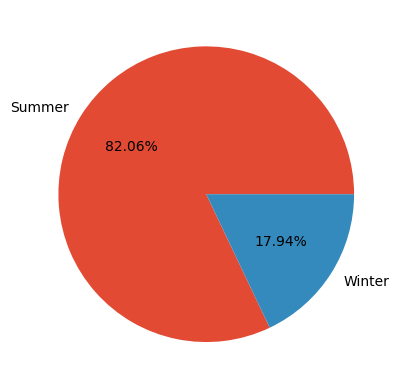

In [136]:
# Qual é a temporada (verão ou inverno) mais comum nos dados?
plt.pie(athletes['Season'].value_counts(),labels=athletes['Season'].value_counts().index,autopct="%.2f%%")